In [ ]:
# Before Starting to run the code, please upload following files:
#       - embed_proteins.py
#       - rnn_gru.pt
#       - data_BacLAB.csv #
#       - data_nonBacLAB.txt #
#       - data_BacLAB_plus_nonBacLAB.txt #
#       - List_kmers.csv #
#       - model_classifier.h5 #
#       - model_classifier.json #

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import script to create Embedding_Vectors
import embed_proteins as ep

In [ ]:
import numpy as np
import csv
import pandas as pd
from keras.preprocessing import sequence
from keras.models import *
from keras.layers import *
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
BacLAB = '/content/drive/MyDrive/Tesis2/2/lat2.csv'
non_BacLAB = '/content/drive/MyDrive/Tesis2/2/nolat2.csv'
data_all= '/content/drive/MyDrive/Tesis2/2/todo2.csv'

# **Visualization Data**

BacLAB:  24964 [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 

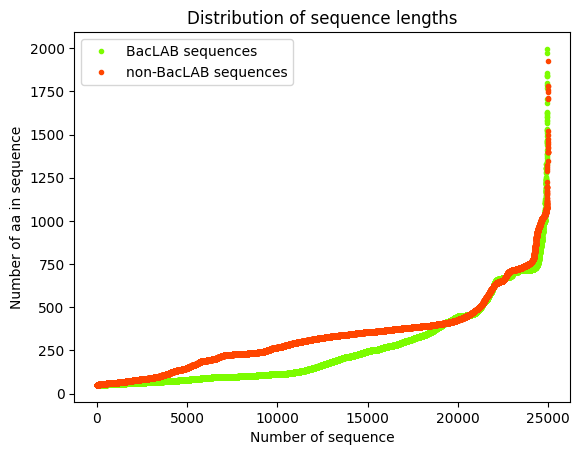

In [ ]:
# Plot Distribution of lengths

from csv import reader

# Dataset of BacLAB
with open(BacLAB, 'r') as file_bac:
  bacLAB = reader(file_bac)
  vec=[]
  for row in bacLAB:
    if len(row[2]) >= 50 and len(row[2]) <= 2000:
      vec.append(len(row[2]))
print('BacLAB: ', len(vec), vec)
print(max(vec))
vec.sort()
plt.plot(vec, '.', color= '#7CFC00', label= 'BacLAB sequences')

# Dataset of non_BacLAB
with open(non_BacLAB, 'r') as file_bac:
  nbacLAB = reader(file_bac)
  vec2=[]
  for row in nbacLAB:
    if len(row[2]) >= 50 and len(row[2]) <= 2000:
      vec2.append(len(row[2]))
print('non_BacLAB: ', len(vec2), vec2)
print(max(vec2))
vec2.sort()
plt.plot(vec2, '.', color= '#FF4500', label= 'non-BacLAB sequences')
plt.title("Distribution of sequence lengths")
plt.xlabel("Number of sequence"); plt.ylabel("Number of aa in sequence")
plt.legend()

# **Feature Extraction**

In [ ]:
# Function, selecting the most common k_mers

from collections import Counter

def most_common_k_mers(sequence, len_kmer):
  len_k_mer= len_kmer
  list_k_mer= []
  for i in range(len(sequence)-(len_k_mer-1)):
    k_m= sequence[i:i+len_k_mer]; #print(k_m)
    list_k_mer.append(k_m)
  #print(list_k_mer)

  return list_k_mer


In [ ]:
# Function, list k_mers most commons in BacLAB

def list_kmers(leng_kmers, num_kmer):
  cont= 0
  with open(BacLAB, newline='') as data_all_BacLAB:
    dat_bacLAB = csv.reader(data_all_BacLAB)
    list_vec= []
    for row in dat_bacLAB:
      if len(row[2])<= 2000 and len(row[2])>=50: # consider lengths lesser than 2000 and greater than 50 aa
        mm= most_common_k_mers(row[2], leng_kmers) # define length of k_mers
        #print(cont)
        cont=cont+1
        list_vec= list_vec + mm
      else: pass

    m = Counter(list_vec); print('Quantity of kmers obtenidos: ', len(m))
    d= m.most_common(num_kmer)
    print("", d)


  list_k_mer_selected= []
  for i in range(len(d)):
    k_mer= d[i][0]; #print(k_mer)
    list_k_mer_selected.append(k_mer)

  print(list_k_mer_selected)
  return list_k_mer_selected

In [ ]:
def freq_k_mer(sequence, list_k_mer_selected):
  vect_k_mer= []
  for i in list_k_mer_selected:
    if i in sequence:
      vect_k_mer.append(1)
    else:
      vect_k_mer.append(0)

  return vect_k_mer

In [ ]:
def get_df_csv(filename):
  data_test0 = pd.read_csv(filename, header=None)
  data_test0= data_test0.drop([0, 1], axis=1) #eliminate colums

  colum= data_test0[2]
  ind= []
  for i in range(len(colum)):
    if len(colum[i]) < 50 or len(colum[i]) > 2000:
      ind.append(i)
    else: pass

  data_test= data_test0.drop(ind) #eliminate rows
  print(len(ind), ind)

  colum = data_test[2]
  a =[]
  nu= 0

  list_k_mer_selected_1= list_kmers(5,100); print('List of kmers type 1, ready¡')
  list_k_mer_selected_2= list_kmers(7, 100); print('List of kmers type 2, ready¡')

  with open('/content/drive/MyDrive/Tesis2/List_kmers.csv', 'w', encoding='UTF8') as f: #save list kmers
      writer = csv.writer(f)
      writer.writerow(list_k_mer_selected_1)
      writer.writerow(list_k_mer_selected_2)

  for sequence in colum:
    nu= nu+1; print(nu, '-----------')
    hidden = ep.get_hidden_state(sequence) # embedding vectors
    hidden= hidden.tolist()

    v_k_mer= freq_k_mer(sequence, list_k_mer_selected_1)
    v_k_mer_2= freq_k_mer(sequence, list_k_mer_selected_2)

    k= v_k_mer + v_k_mer_2 + hidden # join of features

    a.append(k)

  labels= data_test[3]
  b =[]
  for etiq in labels:
    b.append(etiq)

  a_series = pd.Series(a); b_series = pd.Series(b)

  df = [a_series, b_series]
  headers = [0, 1]
  df_data = pd.concat(df, axis=1, keys = headers) # creatting a new DataFrame

  return df_data

In [ ]:
data_n= get_df_csv(data_all)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
44965 -----------
44966 -----------
44967 -----------
44968 -----------
44969 -----------
44970 -----------
44971 -----------
44972 -----------
44973 -----------
44974 -----------
44975 -----------
44976 -----------
44977 -----------
44978 -----------
44979 -----------
44980 -----------
44981 -----------
44982 -----------
44983 -----------
44984 -----------
44985 -----------
44986 -----------
44987 -----------
44988 -----------
44989 -----------
44990 -----------
44991 -----------
44992 -----------
44993 -----------
44994 -----------
44995 -----------
44996 -----------
44997 -----------
44998 -----------
44999 -----------
45000 -----------
45001 -----------
45002 -----------
45003 -----------
45004 -----------
45005 -----------
45006 -----------
45007 -----------
45008 -----------
45009 -----------
45010 -----------
45011 -----------
45012 -----------
45013 -----------
45014 -----------
45015 -----------
45016 ---------

In [ ]:
data_bacLAB = data_n.sample(frac = 1)

In [ ]:
# Data for K-fold
col_BacLAB= data_bacLAB[0]
X_train= col_BacLAB.tolist()
X_train= np.array(X_train)

col_BacLAB= data_bacLAB[1]
Y_train= col_BacLAB.tolist()
Y_train_categorical= np_utils.to_categorical(Y_train)
Y_train= np.array(Y_train)

In [ ]:
shape= X_train.shape; print(shape)
num_features = shape[1]; print(num_features)

shape= Y_train.shape; print(shape)

shape= Y_train_categorical.shape; print(shape)

(49964, 328)
328
(49964,)
(49964, 2)


# **Neural Network**

## **Functions, Plot of NN Performance**

In [ ]:
def plot_accuracy_and_loss(dnn, n_fold):
  print(dnn.history.keys())

  # TRAINING ACCURACY VS TEST ACCURACY
  plt.plot(dnn.history['accuracy'],'#7CFC00', label='training accuracy')
  plt.plot(dnn.history['val_accuracy'],'#FF4500', label='test accuracy')
  plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()
  plt.axhline(y=0.95, linestyle= 'dashed', color= 'k', label= 'Reference at 95% accuracy', linewidth=1)
  #plt.savefig('Accuracy'+str(n_fold)+'.png', dpi= 100)
  plt.show()

  # TRAINING LOSS VS TEST LOSS
  plt.plot(dnn.history['loss'],'#7CFC00', label='training loss')
  plt.plot(dnn.history['val_loss'],'#FF4500', label='test loss')
  plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
  plt.axhline(y=0.1, linestyle= 'dashed', color= 'k', label= 'Reference at 10% loss', linewidth=1)
  #plt.savefig('Loss'+str(n_fold)+'.png', dpi= 100)
  plt.show()

In [ ]:
def plot_conf_matrix(cm, norm=''):
  classes = CATEGORIES
  color1 = '#FCFF3C'
  color2 = '#2ca02c'
  colors = [color1, color2]
  n_bins = 100
  cmap_name = 'custom_cmap'
  custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

  if norm == 'non': fmt = 'd'; title= 'Confusion Matrix - Ensemble Method' # title of Matrix
  else: fmt= '.2f'; title= 'Normalized confusion matrix'

  fig, ax = plt.subplots(figsize=(5, 5))
  im = ax.imshow(cm, interpolation='nearest', cmap=custom_cmap)
  #ax.figure.colorbar(im, ax=ax)

  ax.set(xticks=np.arange(cm.shape[1]), xticklabels=classes,
          yticks=np.arange(cm.shape[0]), yticklabels=classes,
          title=title, ylabel='True label', xlabel='Predicted label')

  thresh = cm.max()/2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, format(cm[i, j], fmt),
                  ha="center", fontsize=10 ,va="center",
                  color="white" if cm[i, j] > thresh else "black")
  plt.tick_params(labelsize=8);
  plt.tight_layout()
  plt.show()

## **Training and Testing**

In [ ]:
from sklearn.model_selection import KFold
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Nadam

CATEGORIES= ['Non-BacLAB', 'BacLAB']

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=30, shuffle=True)

# K-fold Cross Validation model evaluation
n_fold = 1
for train, test in kfold.split(X_train):
  print(len(X_train[train]),len(Y_train[test]))

  model = Sequential()
  def InputBlock(num, shape):
      model.add(Dense(num, activation='relu', input_shape=(num_features, )))
  def DenseBlock(num):
      model.add(Dropout(0.2))
      model.add(Dense(num))
      model.add(BatchNormalization())
      model.add(Activation('relu'))
  def OutputBlock(shape):
      model.add(Dropout(0.6)) #0.2 por 0.1
      model.add(Flatten())
      model.add(Dense(shape))
      model.add(Activation('sigmoid')) #softmax

  InputBlock(128, (num_features, ))
  DenseBlock(64)
  DenseBlock(32)
  OutputBlock(2)


  op = keras.optimizers.Adam(learning_rate=0.000025)
  model.compile(optimizer=op, loss='mean_absolute_error', metrics=['accuracy'])

  model.summary()

  # Generate a print
  print('##########################################')
  print(f'Training for fold {n_fold} ...')
  print('##########################################', '\n')

  # Fit data to model
  dnn = model.fit(X_train[train], Y_train_categorical[train], batch_size=40, epochs= 75, validation_split=0.15, verbose= 1)

  # Generate generalization metrics
  print('=> VALIDATION')
  scores = model.evaluate(X_train[test], Y_train_categorical[test], verbose=1)
  print(f'---> Score for fold {n_fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100} %')
  acc_per_fold.append(scores[1] * 100); loss_per_fold.append(scores[0]* 100)

  # Plot accuracy and loss
  plot_accuracy_and_loss(dnn, n_fold)

  #Making prediction
  y_prob= model.predict(X_train[test])
  y_pred= np.argmax(y_prob, axis=1)
  y_true= np.argmax(Y_train_categorical[test], axis=1)

  num_errors=0
  for i in range(len(y_pred)):
    if y_pred[i] != y_true[i]:
      num_errors= num_errors + 1
    else: pass

  print('Num errors:', num_errors)

  print(classification_report(y_true, y_pred, target_names=CATEGORIES))


  cm = confusion_matrix(y_true, y_pred); print(cm)
  plot_conf_matrix(cm, norm='non')

  cm_n = confusion_matrix(y_true, y_pred, normalize='true'); print(cm_n*100)
  cm_n= cm_n
  plot_conf_matrix(cm_n, norm='n')


  # serialize model to JSON
  model_json = model.to_json()
  with open("/content/model_I"+str(n_fold)+".json", "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights("/content/model_I"+str(n_fold)+".h5")
  print("Saved model to disk")


  # Increase fold number
  n_fold = n_fold + 1

print('           =============================================           ')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

In [ ]:
def load_model():
  # load json and create model
  json_file = open('/content/drive/MyDrive/Tesis2/model_I22.json', 'r')
  loaded_model_json= json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)

  # load weights into new model
  loaded_model.load_weights("/content/drive/MyDrive/Tesis2/model_classifier.h5")

  #print("Loaded model from disk")
  return loaded_model

In [ ]:
def transform_seq(seq):
  #seq= 'YGKGGIGKSTTTQNTVAALSELGKRVMVVGCDPKADSTRLLLGGL'

  hidden = ep.get_hidden_state(seq)
  hidden= hidden.tolist(); print(len(hidden))

  with open('/content/drive/MyDrive/Tesis2/List_kmers.csv', newline='') as lk:
    dat_bacLAB = csv.reader(lk, delimiter=',')
    lkm= []
    for row in dat_bacLAB:
      lkm.append(row)

  list_k_mer_selected_1= lkm[0]
  list_k_mer_selected_2= lkm[1]

  v_k_mer= freq_k_mer(seq, list_k_mer_selected_1)
  v_k_mer_2= freq_k_mer(seq, list_k_mer_selected_2)

  p= v_k_mer + v_k_mer_2 + hidden; print(len(p))
  p = np.array(p).reshape(-1, 328)
  #print(p)

  return p

def pred_seq(p,loaded_model):
  pred_percentage_clases= loaded_model.predict(p)
  pred= np.argmax(pred_percentage_clases, axis=1)

  return pred, round(pred_percentage_clases[0][0]*100, 4), round(pred_percentage_clases[0][1]*100, 4)

def function_pred_seq(seq_coming_from_anvil):

  load_m= load_model();
  p= transform_seq(seq_coming_from_anvil);
  pred, pred_0, pred_1= pred_seq(p, load_m);
  print(pred)
  if pred == 1:
    t= 'sequence is related to BacLAB'
    print(t)
  else:
    t= 'sequence is NOT related to BacLAB'
    print(t)


  return t, pred_0, pred_1

In [ ]:
#This sequence belongs to a bacteriocin produced by a lactic acid bacteria of the  Streptococcus sp. HMSC076C09.
sequence1='SGSGKSTLLNILAMLDQPTEGRVYLNSIDTSTIKNKDASSFRREKLGFVFQDFNLLDTLSVKDNILLPLVLSRRPVKEMMSKVDTVSRELGIHQLLEKYPYEISGGQKQRVAVARAIITSPEILLADEPTGALDSKSSAALLDVFEDINNMGQTILMVTHSTAAAARAKRVLFIKDGILYNQIFRGEKTERQMFQEISDTLTVMAGKEDHDV'

In [ ]:
function_pred_seq(sequence1)

128
328
1/1 [==============================] - 0s 119ms/step
[1]
sequence is related to BacLAB


('sequence is related to BacLAB', 13.6241, 92.536)

In [ ]:
#This sequence belongs to a bacteriocin that is NOT produced by a lactic acid bacteria. Salmonella enterica subsp. houtenae serovar 16:z4.
sequence2='MSKATEQNDKLKRAIIISAVLHIILFAVLIWSSFDEHIETSAGGGGGSAIDAVMVDPGAVVQQHNRQQDQQASARRAEEERKKLQQQQEEELQQKQAAEQERLKQLEKERLAAQEQQKQAEEAAKLAQQQQKQAEEAAKAAADAKKKAEAEAAKAAADAKKKAEAEAAKAAADKKAAAEKAAADKKAAEKRAAADKAAADKAAAKKAAAEKAAAAEGVDDLLGDLSSGKNAPKTGGGAKGNGQPSKDSGTSGANGGATGADISAYAKQIQVAIQSRLYDASLYQGKQCVLHISLAPDGSLKSITSEGGDPALCQAALMAAKTAKIPKPPSQAVYEKIKDAKLDFKL'

In [ ]:
function_pred_seq(sequence2)

128
328
1/1 [==============================] - 0s 124ms/step
[0]
sequence is NOT related to BacLAB


('sequence is NOT related to BacLAB', 86.0602, 14.4987)